In [113]:
import matplotlib.pyplot as plt
import numpy as np
import random
plt.rc('font',family='serif', size=12)  

## Basic Bar Charts and Histograms

- Basic Pyplot function: `ax.bar`

- default rectangle width: `0.8`

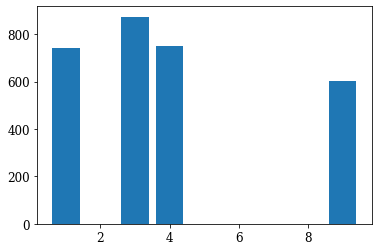

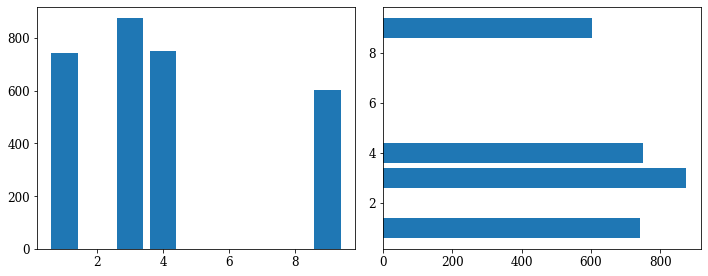

In [128]:
x = [random.randint(1,10) for n in range(5)]
y = [random.randint(500,1000) for n in range(5)]
#simplest bar chart
plt.bar(x,y)
plt.show()

#plotting bar graphs in more low level
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
ax[0].bar(x,y)
ax[1].barh(x,y) #for horizontal barcharts
fig.tight_layout()
plt.show()



### using ticklabels 

**Problem 1:** The following program produces a bar chart of letter frequencies in
the English language, estimated by analysis of the text of Moby-Dick. The vertical bars
are centered and labeled by letter. Source [Gutenberg Book](www.gutenberg.org/ebooks/2701) 

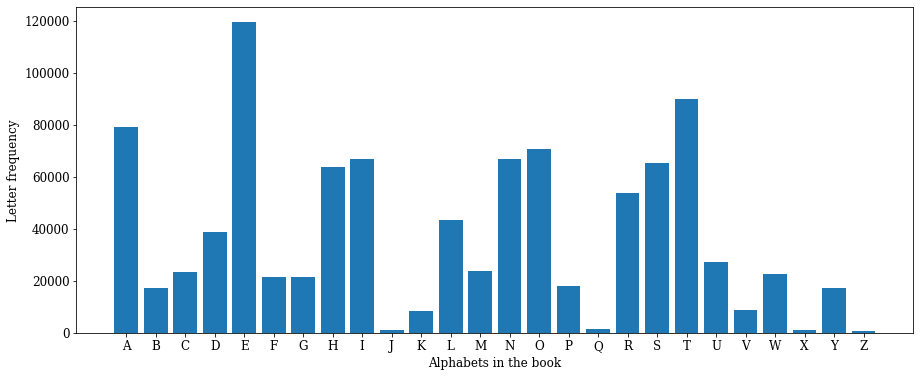

In [117]:
string = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
counts = {string[n]:0 for n in range(26)}

#first reading book and extracting data
with open("datas/moby-dick.txt",'r', encoding='utf8') as file:
    text = file.read().upper()

for s in string:
    counts[s]=text.count(s)

fig, ax = plt.subplots(figsize=(15,6), facecolor='w', edgecolor='w')
ax.bar(range(26), counts.values())

#new commands
ax.set_xticks(range(26)) #it sets ticks at this range or intervals
ax.set_xticklabels(string) #it sets tick labels to alphabets 

ax.set_xlabel('Alphabets in the book', fontfamily="serif", fontsize=12)
ax.set_ylabel('Letter frequency',fontfamily="serif", fontsize=12)
plt.show()

### using hatchpatterns for stacked charts, monochrome plots

**Problem 2:**
The file germany-energy-sources.txt, which can be downloaded from https://scipython.com/eg/bae contains data on the renewable sources of electricityproduced in Germany from 1990 to 2018. Make a program that plots these data as a stacked bar chart in monochrome, using Matplotlib’s hatch patterns to distinguish between the different sources.


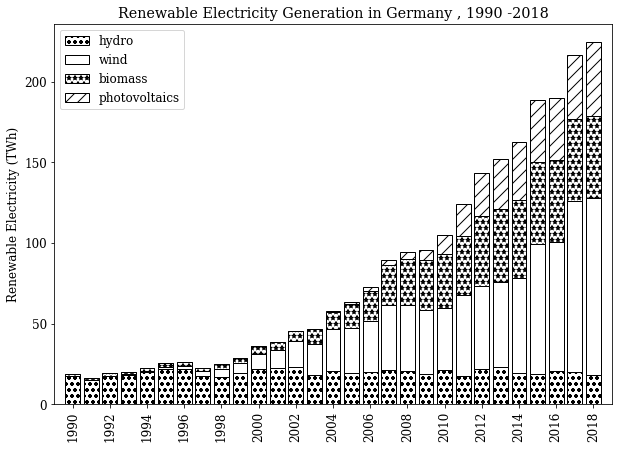

In [157]:
#reading and storing data: 
data = np.loadtxt("datas/renewable-energy-sources-in-germany.txt",skiprows=2, dtype='f8')
sources = ('hydro', 'wind', 'biomass', 'photovoltaics')

years = data[:, 0]
data[:, 1:] /= 1e3 #converting GWh to TWh

fig, ax = plt.subplots(figsize=(10,7))
hatch = ['oo', '', '**', '//']
bottom = np.zeros(len(years))
bars = [None]*len(years)

for i,source in enumerate(sources):
    bars[i] = ax.bar(years,height=data[:, i+1], bottom=bottom, color='w', edgecolor='k', hatch=hatch[i], align='center')
    bottom += data[:, i+1]

ax. set_xticks (years[::2]) # for clarity , label every other year
plt.xticks(rotation =90)
ax.set_xlim (1989 , 2019)
ax. set_ylabel ('Renewable Electricity (TWh)')
ax. set_title ('Renewable Electricity Generation in Germany , 1990 -2018')
plt.legend(bars , sources , loc='best')
plt.show ()
